# Bagging, Pasting, Boosting and Deep Learning Models
### Bagging - Ridge, KNN
### Pasting - Linear SVR, LASSO
### Ada Boosting - Linear Regression, Linear SVR
### Gradient Boosting - Polynomial

## Importing Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

## Loading Datasets

In [41]:
data1= pd.read_csv('audit_risk.csv')
data2= pd.read_csv('trial.csv')

In [42]:
data1.head(3)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0


In [43]:
data2.head(3)

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0


As we can observe from the info of data1(Audit_Risk) , Total number of instances is only 776 whereas we know that there are a total of 777 firms. Also, Money_value has a total of 775 non null values instead of 776 non null values

In [44]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

From the statistics of features in data1, detection risk was found to have zero variance

In [45]:
data1.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [46]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
SCORE_A          776 non-null int64
PARA_B           776 non-null float64
SCORE_B          776 non-null int64
TOTAL            776 non-null float64
numbers          776 non-null float64
Marks            776 non-null int64
Money_Value      775 non-null float64
MONEY_Marks      776 non-null int64
District         776 non-null int64
Loss             776 non-null int64
LOSS_SCORE       776 non-null int64
History          776 non-null int64
History_score    776 non-null int64
Score            776 non-null float64
Risk             776 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 109.2+ KB


In [47]:
data2.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


From the below analyses we found out that forest and electrical have the same sector score and the 777th firm which is missing is from the public health sector

In [48]:
# To find the number of firms in each sector in data1
data1['Sector_score'].value_counts()

55.57    200
3.89     114
1.85      95
2.72      82
3.41      76
2.37      74
1.99      47
21.61     41
59.85     37
2.34       5
15.56      3
2.36       1
17.68      1
Name: Sector_score, dtype: int64

In [49]:
#to find the order in which the sector scores are presesnt
data1['Sector_score'].unique()

array([ 3.89,  3.41,  2.72,  2.37,  1.99,  1.85,  2.36,  2.34, 15.56,
       17.68, 21.61, 59.85, 55.57])

In [50]:
# to find the number of firms in each sector in data2
data1['Sector_score'].value_counts()#to find the order in which the sector scores are presesnt

55.57    200
3.89     114
1.85      95
2.72      82
3.41      76
2.37      74
1.99      47
21.61     41
59.85     37
2.34       5
15.56      3
2.36       1
17.68      1
Name: Sector_score, dtype: int64

In [51]:
#to find the order in which the sector scores are presesnt in data2
data2['Sector_score'].unique()

array([ 3.89,  3.41,  2.72,  2.37,  1.99,  1.85,  2.36,  2.34, 15.56,
       17.68, 21.61, 59.85, 55.57])

In [52]:
#checking weather similar columns are same or diff in bot data1 and data2
list3=list(data1.columns)
list4=list(data2.columns)
list5=[]
for item1 in (list3):
    for item2 in (list4):
        val= data1[item1].equals(data2[item2])
        list5.append(val)
mat=np.matrix(np.array(list5).reshape(len(list3),len(list4)))
df= pd.DataFrame(mat,list3,list4)
df

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
Sector_score,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
LOCATION_ID,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
PARA_A,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Score_A,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Risk_A,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
PARA_B,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Score_B,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Risk_B,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
TOTAL,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
numbers,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


Going by the Dataframe generated above and the dataset descriptions, The columns which should be simalar and are not were identified and the correlation was seen between those columns. Theese columns had 100% corrrel so we decided to take only loss and loss_score from data2

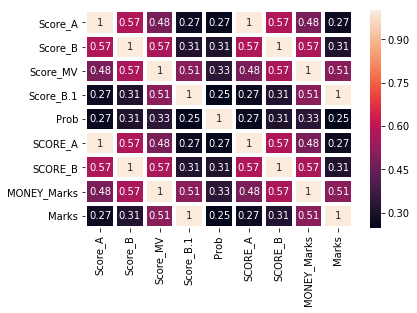

In [53]:
#data1 score a , data2 score a are diff
#data1 score b and data2 scoreb
#score mv and money marks
#scoreb.1 and marks are diff
#district loss and district are the same 
#prob and history score are diffrent
#risk is diff in each column
#money_value and money marks are diff
dat_cor1=data1[['Score_A','Score_B','Score_MV','Score_B.1','Prob']]
dat_cor1.index.names=['key']
dat_cor2=data2[['SCORE_A','SCORE_B','MONEY_Marks','Marks']]
dat_cor2.index.names=['key']
dat_cor=pd.merge(dat_cor1,dat_cor2,on=['key'],how='inner')
sns.heatmap(dat_cor.corr(),annot= True,linecolor='white',linewidths=3)

By the below analysis we found out that if the audit risk score is greater than 1 risk is 1, and if the audit risk score is less than 1 risk is 0. Also Risk in Data1 and Risk in Data 2 should be the same but they are different on 181 instances.
so we dont take the risk column from data2

In [54]:
data1['Risk'].equals(data2['Risk'])
list1=list(data1['Risk'][data1['Risk']!=data2['Risk']].index)
d1risk=data1.iloc[list1,26]
pd.DataFrame(d1risk)['Risk'].value_counts()

0    181
Name: Risk, dtype: int64

In [55]:
d2risk=data2.iloc[list1,17]
pd.DataFrame(d2risk)['Risk'].value_counts()

1    181
Name: Risk, dtype: int64

In [56]:
data1.iloc[list1,:].head(10)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
key,,,,,,,,,,,,,,,,,,,,,
9,3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5.0,...,0.4,0,0.2,0.0,2.4,4.372,0.4,0.5,0.8744,0
13,3.89,8,1.09,0.4,0.436,0.35,0.2,0.070,1.44,5.0,...,0.4,0,0.2,0.0,2.2,1.906,0.4,0.5,0.3812,0
18,3.89,37,1.81,0.4,0.724,1.03,0.2,0.206,2.84,5.0,...,0.4,0,0.2,0.0,2.2,2.330,0.4,0.5,0.4660,0
21,3.89,3,0.02,0.2,0.004,5.94,0.4,2.376,5.96,5.0,...,0.4,0,0.2,0.0,2.6,3.782,0.4,0.5,0.7564,0
29,3.89,37,0.00,0.2,0.000,0.75,0.2,0.150,0.75,5.0,...,0.4,0,0.2,0.0,2.2,4.262,0.4,0.5,0.8524,0
44,3.89,19,1.32,0.4,0.528,0.00,0.2,0.000,1.32,5.0,...,0.4,0,0.2,0.0,2.2,1.940,0.4,0.5,0.3880,0
52,3.89,22,0.00,0.2,0.000,0.93,0.2,0.186,0.93,5.0,...,0.4,0,0.2,0.0,2.2,4.698,0.4,0.5,0.9396,0
61,3.89,11,1.26,0.4,0.504,0.05,0.2,0.010,1.31,5.0,...,0.4,0,0.2,0.0,2.2,1.914,0.4,0.5,0.3828,0
68,3.89,12,1.07,0.4,0.428,0.00,0.2,0.000,1.07,5.0,...,0.4,0,0.2,0.0,2.2,1.828,0.4,0.5,0.3656,0


In [57]:
data2.iloc[list1,:].head(10)

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
key,,,,,,,,,,,,,,,,,,
9,3.89,8,3.98,6,0.99,2,4.97,5.0,2,1.93,2,2,0,2,0,2,2.4,1
13,3.89,8,1.09,4,0.35,2,1.44,5.0,2,0.00,2,2,0,2,0,2,2.2,1
18,3.89,37,1.81,4,1.03,2,2.84,5.0,2,0.00,2,2,0,2,0,2,2.2,1
21,3.89,3,0.02,2,5.94,4,5.96,5.0,2,0.01,2,2,0,2,0,2,2.6,1
29,3.89,37,0.00,2,0.75,2,0.75,5.0,2,6.78,4,2,0,2,0,2,2.2,1
44,3.89,19,1.32,4,0.00,2,1.32,5.0,2,0.06,2,2,0,2,0,2,2.2,1
52,3.89,22,0.00,2,0.93,2,0.93,5.0,2,7.78,4,2,0,2,0,2,2.2,1
61,3.89,11,1.26,4,0.05,2,1.31,5.0,2,0.00,2,2,0,2,0,2,2.2,1
68,3.89,12,1.07,4,0.00,2,1.07,5.0,2,0.00,2,2,0,2,0,2,2.2,1


In [58]:
#if audit risk is greater than 1 risk is 1
x1=data1[['Risk','Audit_Risk']][data1['Risk']==1]
x1[x1['Audit_Risk']<1].shape[0]

0

In [59]:
data2= data2[['Loss','LOSS_SCORE']]

In [60]:
#to find the index of the msiising value
index=data1[data1['Money_Value'].isnull()==True]
data1.drop('Detection_Risk',axis=1,inplace=True)
med= data1[data1['Sector_score']== 55.57]['Money_Value'].median()
data1.fillna(value=med,inplace=True)
data1['Money_Value'].isnull().sum()

0

In [61]:
#merging Audit risk(data1) and Trial(data2)
data1.index.names= ['key']
data= pd.merge(data1,data2,on=['key'],how='inner')


### Removing Duplicated Rows

In [62]:
data=data[data.duplicated(subset=None, keep='first')==False]

### Average Audit Risk Scores for each Location ID

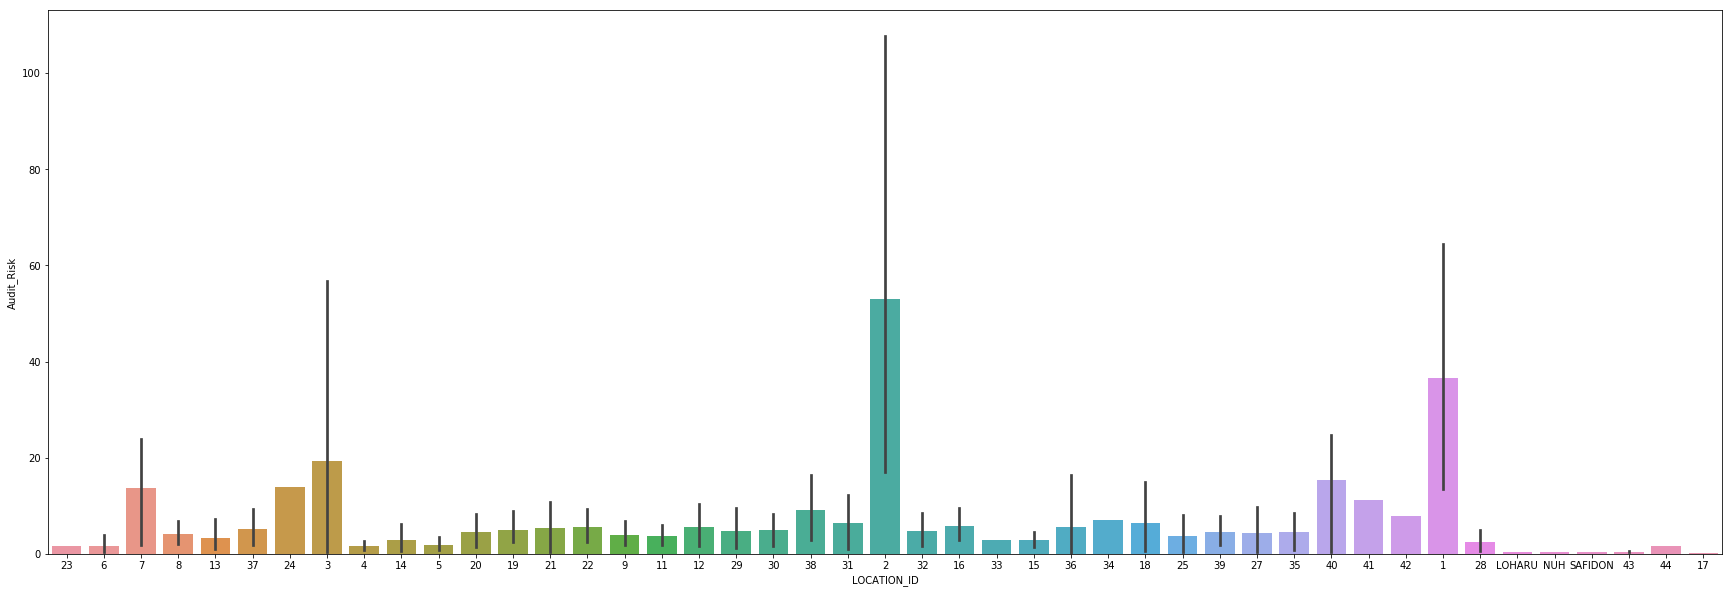

In [63]:
plt.figure(figsize=(30,10))
sns.barplot(x='LOCATION_ID',y='Audit_Risk',data= data,estimator=np.mean)

In [64]:
## Imputing non_numeric values in LOCATION_ID Column
data['LOCATION_ID'].replace(['LOHARU', 'NUH','SAFIDON'],['10','26','45'],inplace=True)

### Average Audit Risk Scores for each Sector Score

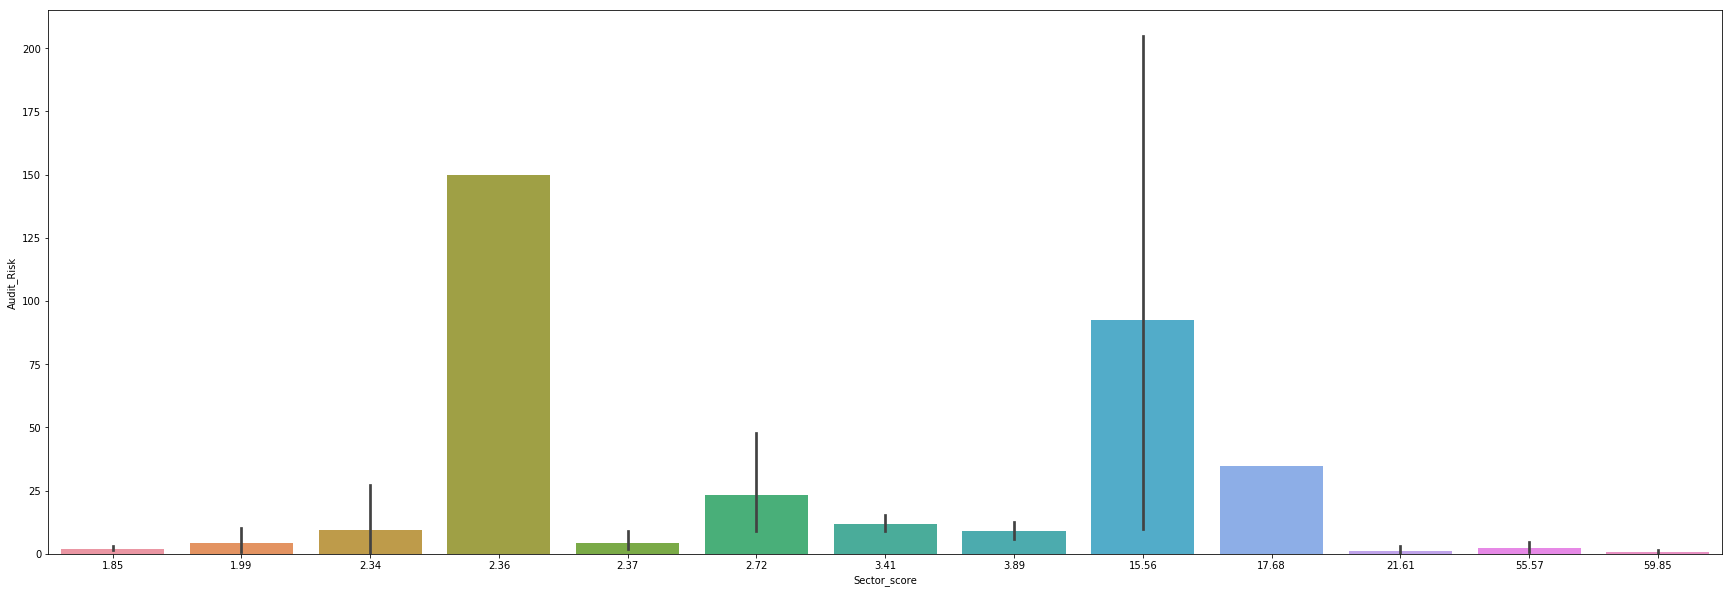

In [25]:
plt.figure(figsize=(30,10))
sns.barplot(x='Sector_score',y='Audit_Risk',data= data,estimator=np.mean)

Upon Further analyzing the correlation  we found that more features were correlated with each otheter by a high percentage, so we took the threshold as 0.70 , so if the correlation is above 0.70 we drop one of them using the prior knowldge we have about the variables from the data descriptions and the relations between them

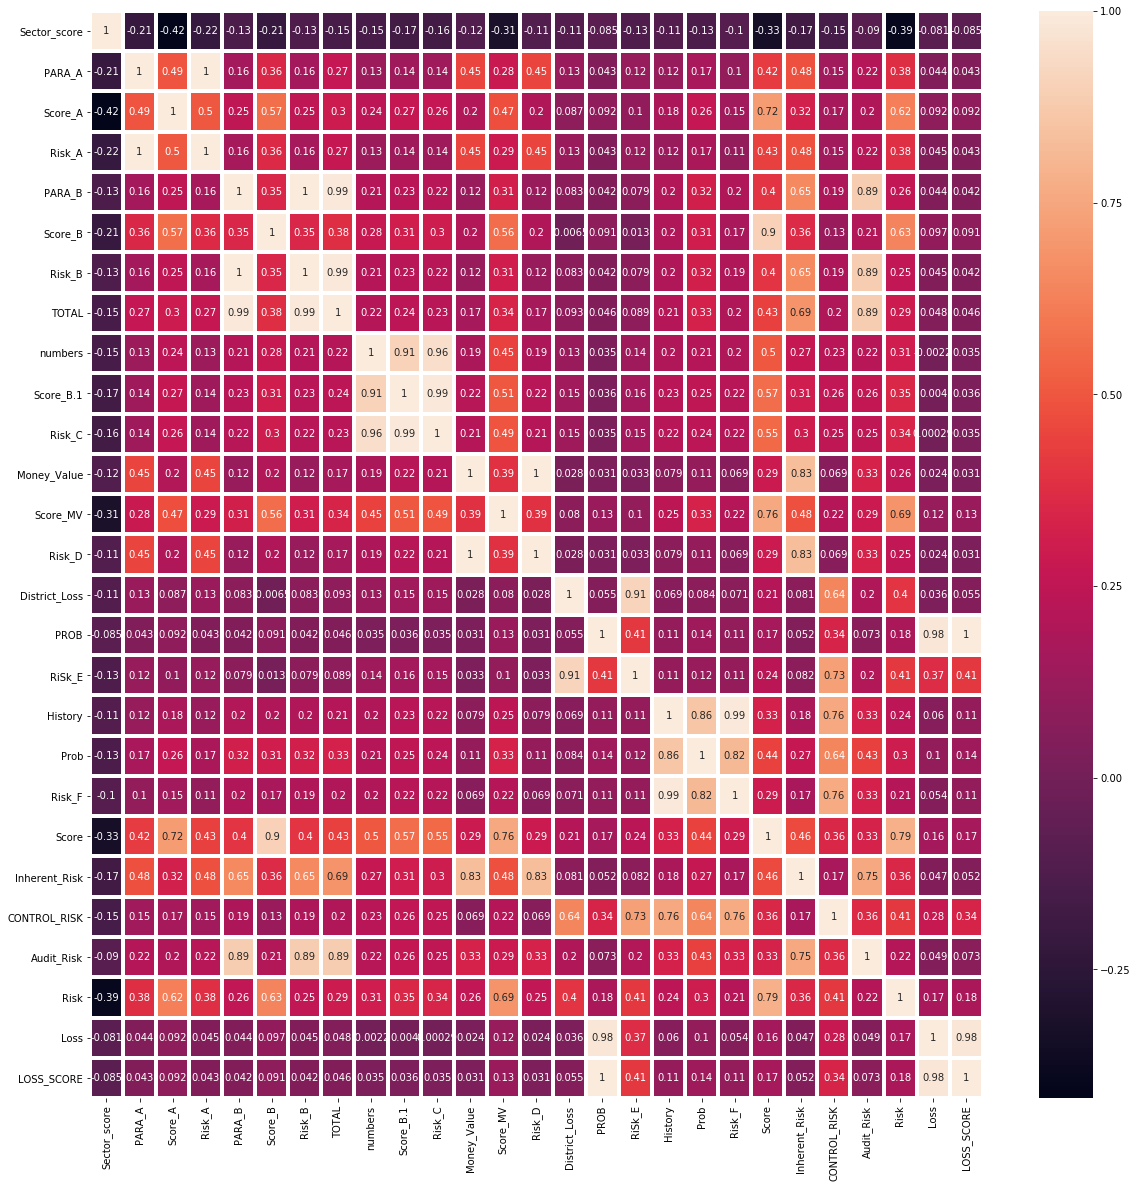

In [26]:
#corelation matrix
plt.figure(figsize=(20,20))
data_copy=data
data_copy.drop('LOCATION_ID',axis=1,inplace=True)
d=data_copy.corr()
sns.heatmap(d,annot= True,linecolor='white',linewidths=3)

### Final correlation matrix

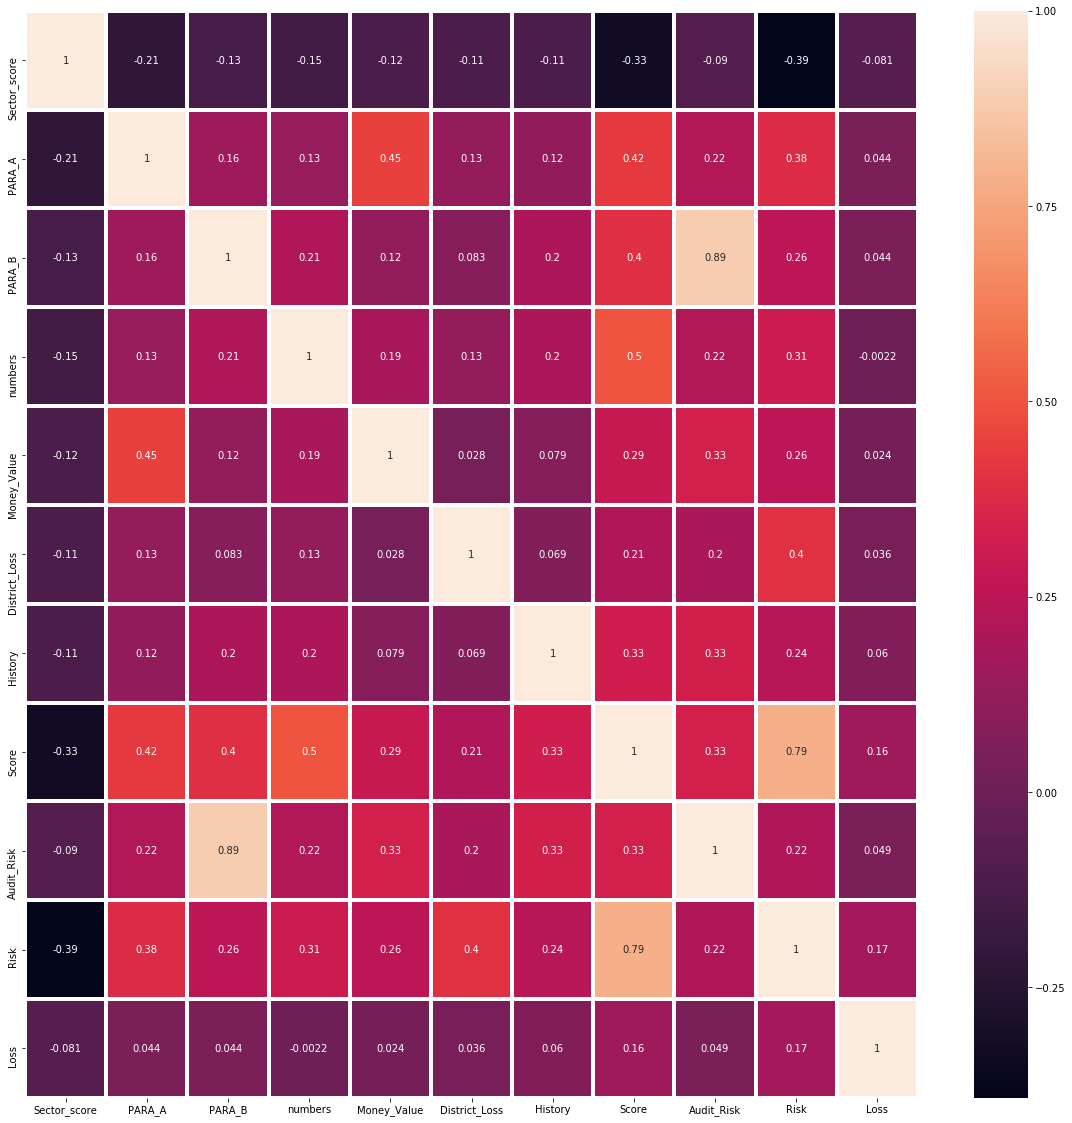

In [27]:
data.drop(['Risk_A','Score_A','Risk_B','Score_B','Score_B.1','Risk_C','Risk_D','Inherent_Risk','Score_MV','RiSk_E','PROB','CONTROL_RISK','Risk_F','LOSS_SCORE','Prob','TOTAL'],axis=1,inplace=True)
data_corr1= data.corr()
fig=plt.figure(figsize=(20,20))
sns.heatmap(data_corr1,annot= True,linecolor='white',linewidths=3)

### Removal of Outliers

1)So, the outliers that seemed rare were audit risk of 961.5144 for a firm in sector with score 2.72, the average audit risk score for this sector is less than 50, so this is a outlier and this is caused by a high paara b value which is greater than 1200

2)The firm with audit risk 222 is part of a sector with average risk score less than 20 so this can also be considered as a outlier

3)the firm with audit risk 204 is part of a sector which has very few instances(3) so we cannot consider this as an outlier

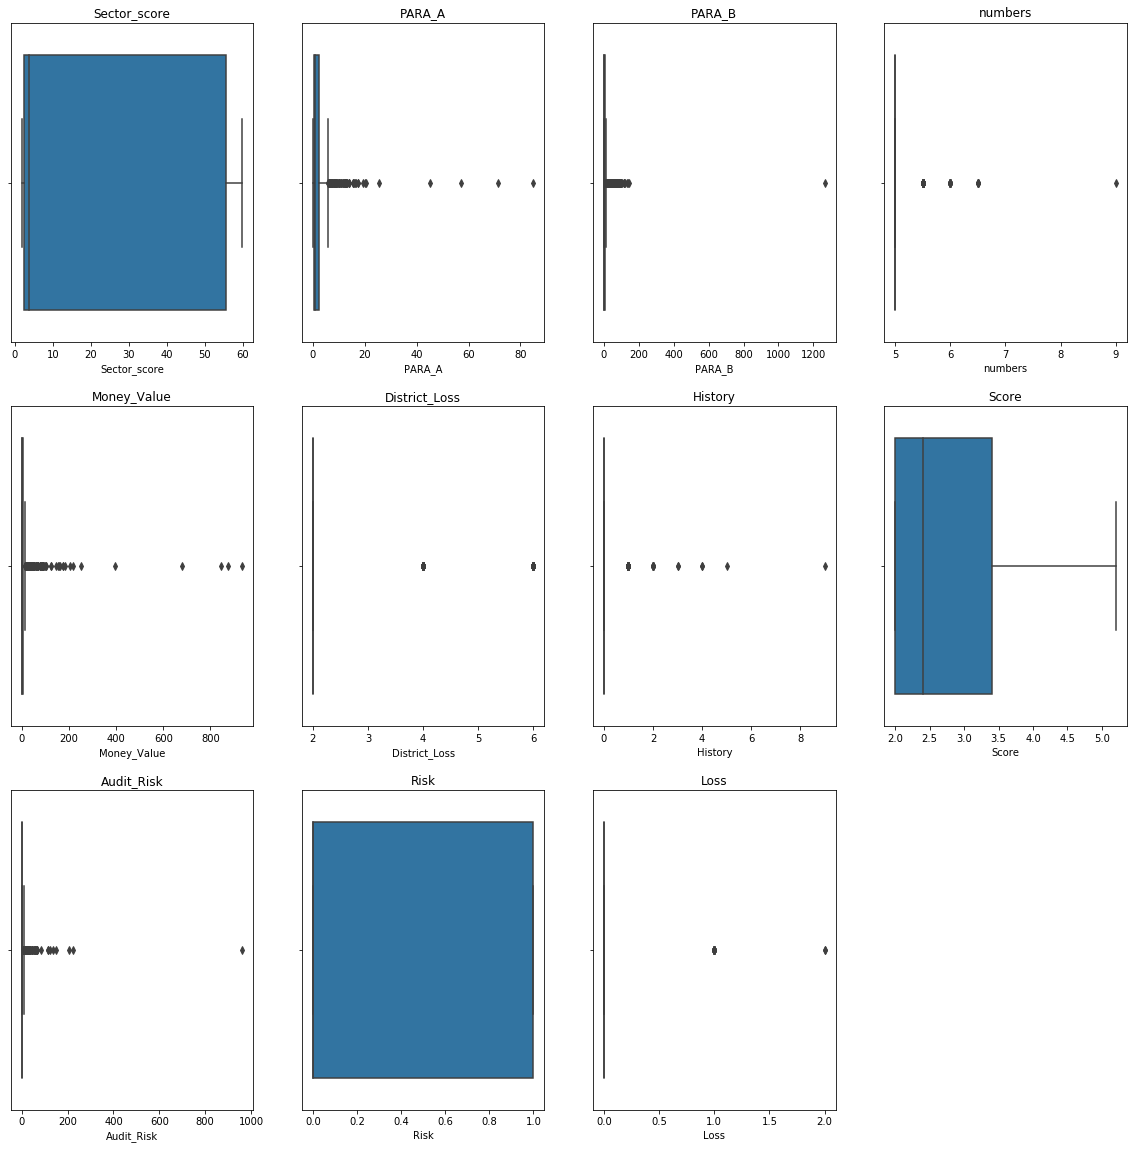

In [28]:
plt.figure(figsize=(20,20))
for i in range(0,data.shape[1]):
        plt.subplot(3,4,i+1)
        sns.boxplot(data.iloc[:,i])
        plt.title(data.columns[i])

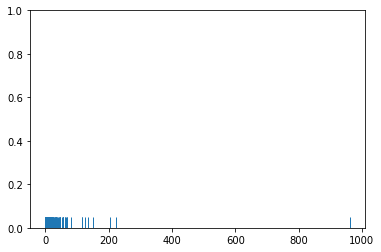

In [29]:
data[data['PARA_B']>1000]
data[data['Audit_Risk']>200]
sns.rugplot(data['Audit_Risk'])
data=data.drop([241,584],axis=0)

In [30]:
data_risk = data
data = data.drop('Risk', axis = 1)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 775
Data columns (total 10 columns):
Sector_score     761 non-null float64
PARA_A           761 non-null float64
PARA_B           761 non-null float64
numbers          761 non-null float64
Money_Value      761 non-null float64
District_Loss    761 non-null int64
History          761 non-null int64
Score            761 non-null float64
Audit_Risk       761 non-null float64
Loss             761 non-null int64
dtypes: float64(7), int64(3)
memory usage: 65.4 KB


# Regressions

In [32]:
from sklearn.model_selection import train_test_split
x= data.drop('Audit_Risk',axis=1)
y=data['Audit_Risk']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


# 1. Linear Regression

In [34]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(x_train,y_train)
print("Train:%.4f"%lr.score(x_train,y_train))
print("Test:%.4f"%lr.score(x_test,y_test))

Train:0.7797
Test:0.7583


## Applying AdaBoost on Linear Regression

In [35]:
#grid search to find the best parameters

from sklearn.ensemble import AdaBoostRegressor
param_grid=[{'n_estimators':[2,5,10,25,100,150,200,300,400,500],'learning_rate':[0.0001,0.01,0.02,0.03,0.04,0.05,0.06,0.1,0.15]}]
lr = LinearRegression(fit_intercept=True)
ada_lr = AdaBoostRegressor(lr,random_state=0)
grid = GridSearchCV(ada_lr,param_grid,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

C:\Users\jmoha\AppData\Local\conda\conda\envs\fluffy\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.01, 'n_estimators': 10}

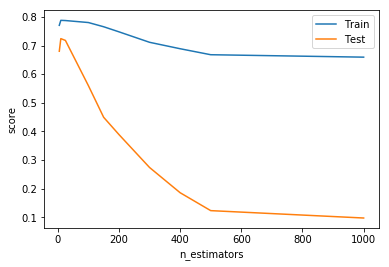

In [41]:
#plotting a train test graph to see if the param  n_estimator is reliable
train_score_list=[]
test_score_list=[]
for i in [5,10,25,100,150,200,300,400,500,1000]:
    lr = LinearRegression(fit_intercept=True)
    ada = AdaBoostRegressor(lr,n_estimators=i,learning_rate=0.01,random_state=0)
    ada.fit(x_train,y_train)
    val_train=ada.score(x_train,y_train)
    train_score_list.append(val_train)
    val_test= ada.score(x_test,y_test)
    test_score_list.append(val_test)
#plot
plt.figure()
plt.plot([5,10,25,100,150,200,300,400,500,1000],train_score_list,label='Train')
plt.plot([5,10,25,100,150,200,300,400,500,1000],test_score_list,label='Test')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend()
plt.show()

In [42]:
print('train score after using ada boost is ')
print(train_score_list[1])


train score after using ada boost is 
0.787934372176355


In [46]:
print('test score  after using ada boost is ')
print(test_score_list[1])

test score  after using ada boost is 
0.7240636099309167


Running Gradient Descent to avoid underfitting as the train score is low, discovered that the coeficients given by the Linear Regrerssion are already the optimum coefiecients

In [47]:
lr=LinearRegression(fit_intercept=True)
lr.fit(x_train,y_train)
ones=np.ones((x_train.shape[0],1))
array=np.array(x_train)
xdesg=np.matrix(np.hstack((ones,array)))
xdesg=np.matrix(xdesg)
coef=lr.coef_.tolist()
coef.insert(0,lr.intercept_)
theta1=(np.array(coef).reshape(10,1))
y_actual=np.array(y_train).reshape(x_train.shape[0],1)
theta1

array([[ 5.96834288],
       [ 0.62534727],
       [ 1.57020272],
       [ 3.30097659],
       [ 3.39464987],
       [ 8.78855185],
       [ 2.98814887],
       [ 5.57337959],
       [-0.53643753],
       [ 1.14039543]])

### Performing Gradient Descent

In [48]:
def hypothesis(theta, X,n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.dot(theta,xdesg.T[:,i]))
    h = h.reshape(X.shape[0],1)
    return h

In [49]:
h=hypothesis(theta1,xdesg,9)

In [50]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * float(sum(h - y))
        for j in range(1,n+1):
            theta[j] = theta[j] - ((alpha/X.shape[0]) * float(sum(np.dot(X.T[j],(h-y)))))
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * float(sum(np.square(h - y_actual)))
    theta = theta.reshape(1,n+1)
    return theta, cost

In [51]:
def linear_regression(X, y, alpha, num_iters):
    n = 9
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, xdesg, 9)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

In [52]:
list1=[]
for alpha in [0.001,0.01,0.1]:
    list1.append(linear_regression(xdesg,y_actual,alpha,1000)[1])

In [53]:
linear_regression(xdesg,y_actual,0.1,1000)

(array([[ 5.96834288,  0.62534727,  1.57020272,  3.30097659,  3.39464987,
          8.78855185,  2.98814887,  5.57337959, -0.53643753,  1.14039543]]),
 array([111.74585311,  84.65636294,  69.08268139,  59.60392223,
         53.45455178,  49.20438934,  46.09832693,  43.72540306,
         41.85241923,  40.33985763,  39.09904241,  38.07003386,
         37.20999647,  36.48690064,  35.87597429,  35.35759965,
         34.9159909 ,  34.53831058,  34.21404519,  33.93454297,
         33.69265966,  33.48248023,  33.29909658,  33.13842811,
         32.99707577,  32.87220286,  32.76143734,  32.66279167,
         32.57459678,  32.49544781,  32.42415934,  32.35972845,
         32.30130426,  32.24816268,  32.19968563,  32.15534375,
         32.11468208,  32.07730825,  32.04288258,  32.01110991,
         31.98173275,  31.95452562,  31.92929028,  31.90585175,
         31.884055  ,  31.86376214,  31.84485005,  31.82720841,
         31.81073806,  31.79534949,  31.78096173,  31.76750125,
         31.75490

### Cost Function Vs Number Of Iterations gradient descent

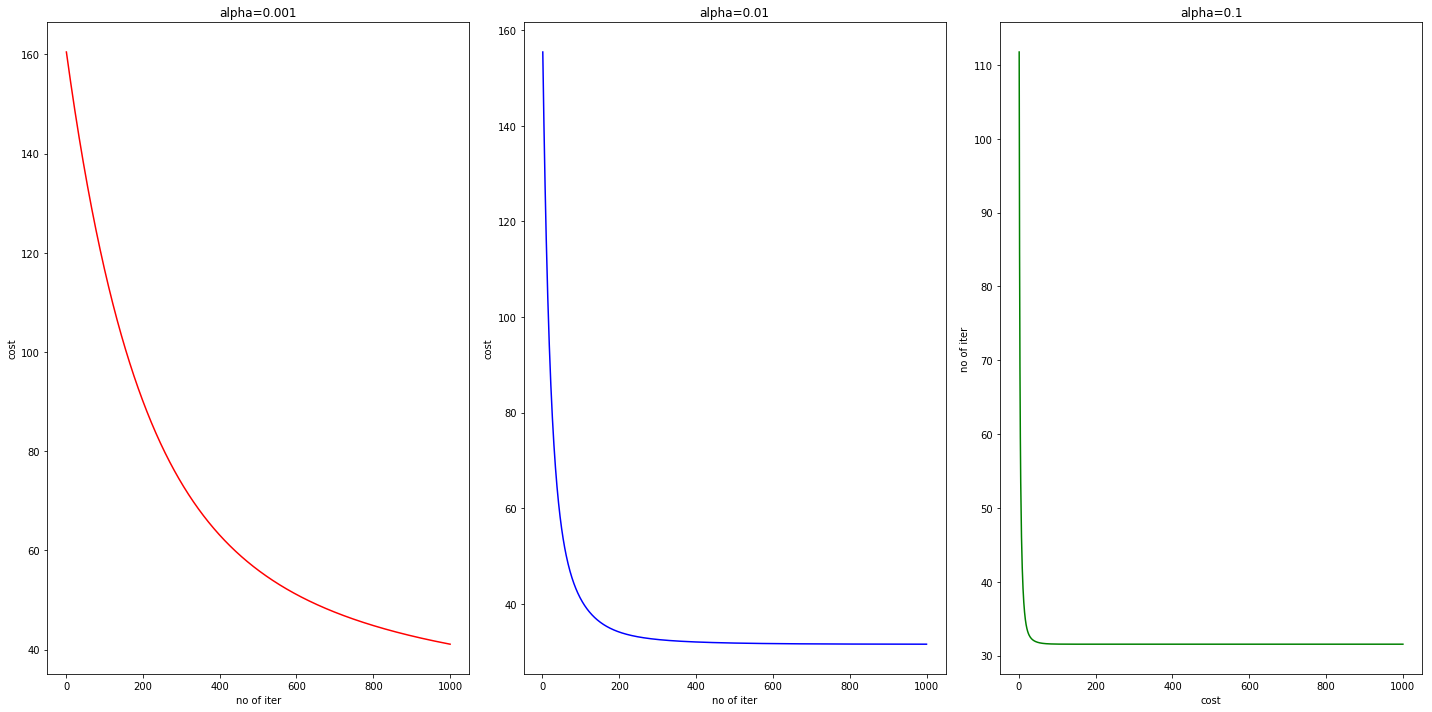

In [54]:
plt.figure(figsize=(20,10))
listalpha1=list1[0].tolist()
listalpha2=list1[1].tolist()
listalpha3= list1[2].tolist()
plt.subplot(1,3,1)
plt.plot(list(range(1,1001)),listalpha1,'r')
plt.ylabel('cost')
plt.xlabel('no of iter')
plt.title('alpha=0.001')
plt.subplot(1,3,2)
plt.plot(np.arange(1,1001).tolist(),listalpha2,'b')
plt.ylabel('cost')
plt.xlabel('no of iter')
plt.title('alpha=0.01')
plt.subplot(1,3,3)
plt.plot(np.arange(1,1001).tolist(),listalpha3,'g')
plt.xlabel('cost')
plt.ylabel('no of iter')
plt.title('alpha=0.1')
plt.tight_layout()

In [55]:
# Cross Validation
from sklearn.model_selection import cross_val_score
reg = LinearRegression(fit_intercept=True)
scores_train= cross_val_score(reg, x_train,y_train,cv=5)
scores_test= cross_val_score(reg,x_test,y_test)
print('mean train score is {}'.format(scores_train.mean()))
print('mean test score is {}'.format(scores_test.mean()))

mean train score is 0.4591950795684445
mean test score is 0.6439257948605519


D:\Anaconda\envs\python3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


# 2. Ridge

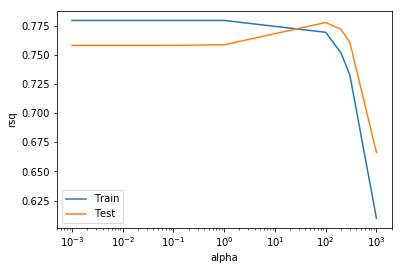

In [56]:
from  sklearn.linear_model import Ridge

x_range = [0.001,0.01,0.1,1,100,200,300,1000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha,fit_intercept=True)
    ridge.fit(x_train,y_train)
    train_score_list.append(ridge.score(x_train,y_train))
    test_score_list.append(ridge.score(x_test, y_test))
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x_range,train_score_list,label='Train')
plt.plot(x_range,test_score_list,label='Test')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('rsq')
plt.legend()
plt.show()

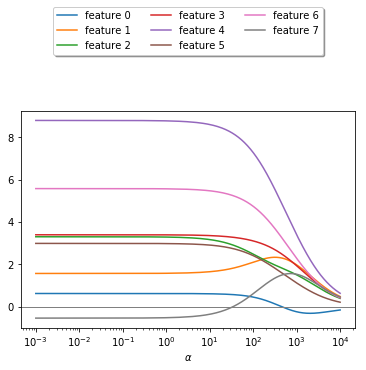

In [57]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha,fit_intercept=False)
    ridge.fit(x_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,8):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [58]:
#grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
a = [0.001,0.01,0.1,1,100,1000]
param_grid = dict(alpha=a)
grid = GridSearchCV(ridge, param_grid, cv=5)
grid.fit(x_train,y_train)
print('best param is alpha ={}'.format(grid.best_params_))

best param is alpha ={'alpha': 100}


D:\Anaconda\envs\python3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [59]:
#cross validation
ridge = Ridge(alpha =100)
train_score_list = cross_val_score(ridge,x_train,y_train,cv=5)
test_score_list = cross_val_score(ridge,x_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.6380
Avg Test Score:0.5647


In [60]:
#train and test score for alpha=100
ridge=Ridge(alpha=100)
rid=ridge.fit(x_train,y_train)
train_score=rid.score(x_train,y_train)
test_score= rid.score(x_test,y_test)
print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:0.769547015844391
test_score:0.7779265481389259


## Applying Bagging on Ridge

In [156]:
#grid search for bagging params
from sklearn.ensemble import BaggingRegressor
param_grid=[{'n_estimators':[50,100,150,200,300,400],'max_samples':[0.2,0.4,0.6,0.8,1.0]}]
ridge= Ridge(alpha=100)
bag_reg= BaggingRegressor(ridge,bootstrap=True, n_jobs=-1,oob_score=True,random_state=0)
grid = GridSearchCV(bag_reg,param_grid,cv=5)
grid.fit(x_train,y_train)
grid.best_params_


D:\Anaconda\envs\python3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_samples': 0.4, 'n_estimators': 400}

plotting a graph to cross check the best bagging parameter n_estimators

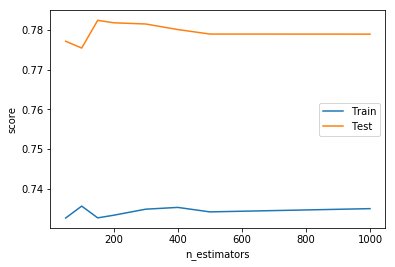

In [61]:
#bagging
from sklearn.ensemble import BaggingRegressor
train_score_list=[]
test_score_list=[]
for i in [50,100,150,200,300,400,500,1000]:
    ridge=Ridge(alpha=100)
    bag_reg= BaggingRegressor(ridge,n_estimators=i,max_samples=0.4,bootstrap=True, n_jobs=-1,random_state=0)
    bag_reg.fit(x_train,y_train)
    val_train=bag_reg.score(x_train,y_train)
    train_score_list.append(val_train)
    val_test= bag_reg.score(x_test,y_test)
    test_score_list.append(val_test)
#plot
plt.figure()
plt.plot([50,100,150,200,300,400,500,1000],train_score_list,label='Train')
plt.plot([50,100,150,200,300,400,500,1000],test_score_list,label='Test')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend()
plt.show()


In [62]:
print(test_score_list[5])

0.7801177509550046


In [63]:
print(train_score_list[5])

0.7353327154445919


# 3. LASSO

Text(0.5, 0, '$\\alpha$')

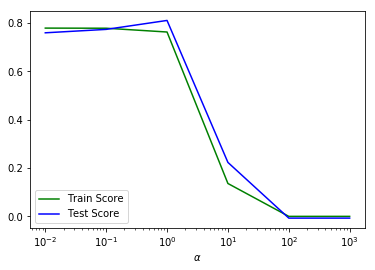

In [64]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100,1000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha,fit_intercept=True)
    lasso.fit(x_train,y_train)
    train_score_list.append(lasso.score(x_train,y_train))
    test_score_list.append(lasso.score(x_test, y_test))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

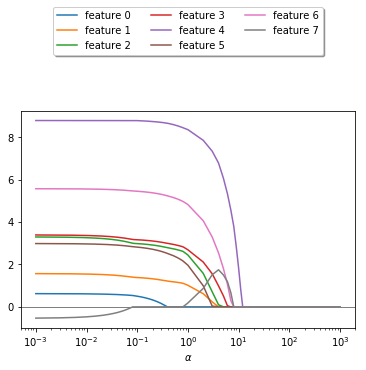

In [65]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha,fit_intercept=True)
    lasso.fit(x_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,8):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [66]:
#grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
a = [0.01,0.1,1,10,100,1000]
param_grid = dict(alpha=a)
grid = GridSearchCV(lasso, param_grid, cv=5)
grid.fit(x_train,y_train)
print('best param is alpha ={}'.format(grid.best_params_))

best param is alpha ={'alpha': 1}


D:\Anaconda\envs\python3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [67]:
# Using Cross Validation
from sklearn.model_selection import cross_val_score
lasso = Lasso(alpha=1)
train_score_list = cross_val_score(lasso,x_train,y_train,cv=5)
test_score_list = cross_val_score(lasso,x_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.5559
Avg Test Score:0.5904


In [68]:
#train and test score for alpha=1
lasso=Lasso(alpha=1)
lass=lasso.fit(x_train,y_train)
train_score=lass.score(x_train,y_train)
test_score= lass.score(x_test,y_test)
print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:0.7635412692651742
test_score:0.811431883488675


## Applying Pasting on LASSO

In [69]:
#grid search for pasting params
param_grid=[{'n_estimators':[50,100,150,200,300,400,500],'max_samples':[0.1,0.2,0.4,0.6,0.8,1.0]}]
lasso=Lasso(alpha=1)
bag_reg= BaggingRegressor(lasso,bootstrap=False, n_jobs=-1,random_state=0)
grid = GridSearchCV(bag_reg,param_grid,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

D:\Anaconda\envs\python3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_samples': 0.2, 'n_estimators': 50}

plotting a graph to cross check the best bagging parameters n_estimators

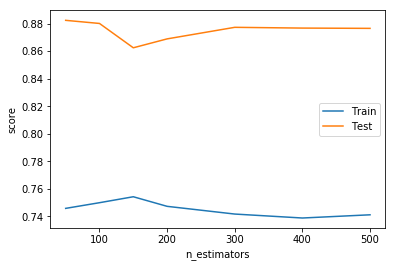

In [70]:
#pasting
from sklearn.ensemble import BaggingRegressor
train_score_list=[]
test_score_list=[]
for i in [50,100,150,200,300,400,500]:
    lasso=Lasso(alpha=1)
    bag_reg= BaggingRegressor(lasso,n_estimators=i,max_samples=0.2,bootstrap=False, n_jobs=-1,random_state=0)
    bag_reg.fit(x_train,y_train)
    val_train=bag_reg.score(x_train,y_train)
    train_score_list.append(val_train)
    val_test= bag_reg.score(x_test,y_test)
    test_score_list.append(val_test)
#plot
plt.figure()
plt.plot([50,100,150,200,300,400,500],train_score_list,label='Train')
plt.plot([50,100,150,200,300,400,500],test_score_list,label='Test')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend()
plt.show()

In [71]:
print(train_score_list[0])
print(test_score_list[0])


0.7458632087398638
0.8823990402433605


# 4. KNN Regression

Text(0, 0.5, 'rsq')

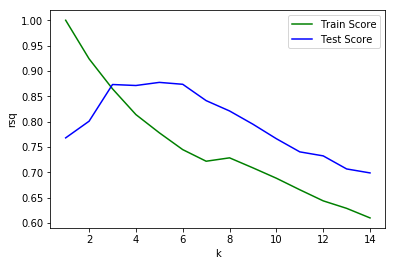

In [72]:
#kneibhours regressor
np.random.seed(0)
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,15):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(x_train, y_train)
    train_score_array.append(knn_reg.score(x_train, y_train))
    test_score_array.append(knn_reg.score(x_test, y_test))

x_axis = range(1,15)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('rsq')

In [73]:
#grid search
from sklearn.model_selection import GridSearchCV
k = [2,3,4,5,6,7,8,9]
param_grid = dict(n_neighbors=k)
grid = GridSearchCV(knn_reg, param_grid, cv=5)
grid.fit(x_train,y_train)
print('best param is k ={}'.format(grid.best_params_))

best param is k ={'n_neighbors': 2}


D:\Anaconda\envs\python3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [74]:
# Using Cross Validation
from sklearn.model_selection import cross_val_score
knn_reg = KNeighborsRegressor(n_neighbors=2)
train_score_list = cross_val_score(knn_reg,x_train,y_train,cv=5)
test_score_list = cross_val_score(knn_reg,x_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.6658
Avg Test Score:0.2562


In [75]:
#using knn,k=2
knn= KNeighborsRegressor(n_neighbors=2)
kn=knn.fit(x_train,y_train)
train_score=kn.score(x_train,y_train)
test_score=kn.score(x_test,y_test)
print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:0.9238485096788882
test_score:0.8006636778052456


## Applying Bagging on KNN

In [76]:
#grid search for bagging params
param_grid=[{'n_estimators':[50,100,150,200,300,400],'max_samples':[0.1,0.2,0.4,0.6,0.8]}]
knn_reg = KNeighborsRegressor(algorithm='brute',n_neighbors=2)
bag_reg= BaggingRegressor(knn_reg,bootstrap=True, n_jobs=-1,oob_score=True,random_state=0)
grid = GridSearchCV(bag_reg,param_grid,cv=5)
grid.fit(x_train,y_train)
grid.best_params_


D:\Anaconda\envs\python3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_samples': 0.8, 'n_estimators': 400}

plotting a graph to cross check the best bagging param n_estimator

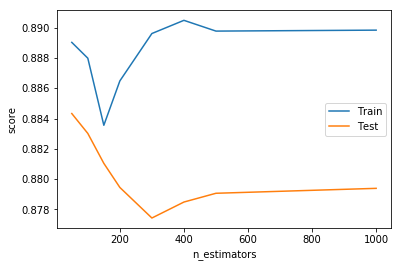

In [77]:
#bagging
from sklearn.ensemble import BaggingRegressor
train_score_list=[]
test_score_list=[]
for i in [50,100,150,200,300,400,500,1000]:
    knn_reg = KNeighborsRegressor(algorithm='brute',n_neighbors=2)
    bag_reg= BaggingRegressor(knn_reg,n_estimators=i,max_samples=0.8,bootstrap=True, n_jobs=-1,random_state=0)
    bag_reg.fit(x_train,y_train)
    val_train=bag_reg.score(x_train,y_train)
    train_score_list.append(val_train)
    val_test= bag_reg.score(x_test,y_test)
    test_score_list.append(val_test)
#plot
plt.figure()
plt.plot([50,100,150,200,300,400,500,1000],train_score_list,label='Train')
plt.plot([50,100,150,200,300,400,500,1000],test_score_list,label='Test')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend()
plt.show()

In [78]:
print(train_score_list[5],test_score_list[5])

0.8904803296016277 0.8784876034347054


# 5. Polynomial Regression

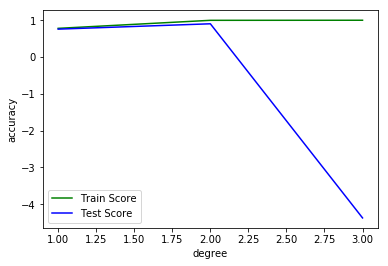

In [36]:
from  sklearn.preprocessing  import PolynomialFeatures
np.random.seed(0)
train_score_list = []
test_score_list = []

for n in range(1,4):
    poly = PolynomialFeatures(n)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    lr= LinearRegression(fit_intercept=True)
    lr.fit(x_train_poly, y_train)
    train_score_list.append(lr.score(x_train_poly, y_train))
    test_score_list.append(lr.score(x_test_poly, y_test))
%matplotlib inline

x_axis = range(1,4)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [37]:
train_score_list

[0.7797227749461084, 0.9978725176711574, 0.9999841233659418]

In [38]:
test_score_list

[0.7582570475916155, 0.903591824906198, -4.373184785098858]

In [39]:
#cross validation
from sklearn.model_selection import cross_val_score
np.random.seed(0)
scores_test=[]
scores_train=[]
poly = PolynomialFeatures(1)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
lr=LinearRegression()
lr.fit(x_train_poly,y_train)
scores_train = cross_val_score(lr,x_train_poly,y_train,cv=5)
scores_test = cross_val_score(lr,x_test_poly,y_test,cv=5)
print("Cross-validation Train scores: {}".format(scores_train))
print("Average Train cross-validation score: {:.2f}".format(scores_train.mean()))
print("Cross-validation Test scores: {}".format(scores_test))
print("Average Test cross-validation score: {:.2f}".format(scores_test.mean()))

Cross-validation Train scores: [ 0.79781013  0.76275565  0.7182267   0.81519858 -0.79801567]
Average Train cross-validation score: 0.46
Cross-validation Test scores: [0.58365085 0.69511939 0.7758898  0.93842335 0.79994705]
Average Test cross-validation score: 0.76


## Applying Gradient Boosting on Polynomial Regression

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
param_grid=[{'n_estimators':[50,100,150,200,300,400,500,1000],'learning_rate':[0.01,0.02,0.03,0.04,0.05,0.06,0.1,0.15]}]
grad = GradientBoostingRegressor(random_state=0)
grid = GridSearchCV(grad,param_grid,cv=5)
grid.fit(x_train_poly,y_train)
grid.best_params_

D:\Anaconda\envs\python3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.1, 'n_estimators': 500}

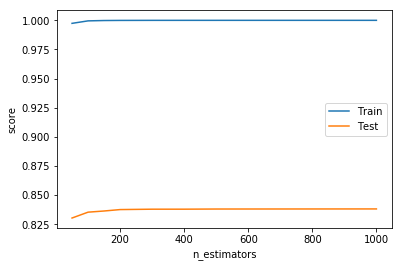

In [94]:
#plottting a graph to see weather the best param n_estimator can be relied upon
train_score_list=[]
test_score_list=[]
for i in [50,100,150,200,300,400,500,1000]:
    grad = GradientBoostingRegressor(n_estimators=i,learning_rate=0.1,random_state=0)
    grad.fit(x_train_poly,y_train)
    val_train=grad.score(x_train_poly,y_train)
    train_score_list.append(val_train)
    val_test= grad.score(x_test_poly,y_test)
    test_score_list.append(val_test)
#plot
plt.figure()
plt.plot([50,100,150,200,300,400,500,1000],train_score_list,label='Train')
plt.plot([50,100,150,200,300,400,500,1000],test_score_list,label='Test')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend()
plt.show()

In [95]:
print(train_score_list[6],test_score_list[6])

0.9999981994849142 0.8380850864877872


In [96]:
from sklearn.ensemble import GradientBoostingRegressor
grad = GradientBoostingRegressor(n_estimators=500,learning_rate=0.1,random_state=0)
grad.fit(x_train_poly,y_train)
print('Train score: {:.4f}'.format(grad.score(x_train_poly,y_train)))
print('Test score: {:.4f}'.format(grad.score(x_test_poly, y_test)))

Train score: 1.0000
Test score: 0.8381


In [97]:
train_score_list

[0.9974168666067517,
 0.9995418478182955,
 0.9998367556866137,
 0.9999332590434041,
 0.9999838670388934,
 0.9999951274777228,
 0.9999981994849142,
 0.99999995403479]

In [98]:
test_score_list

[0.8303769989618411,
 0.8353907358146784,
 0.8363952763349318,
 0.8376155884517502,
 0.8379404997120288,
 0.8379529354366458,
 0.8380850864877872,
 0.8381699950913314]

# 6. Linear SVM Regression

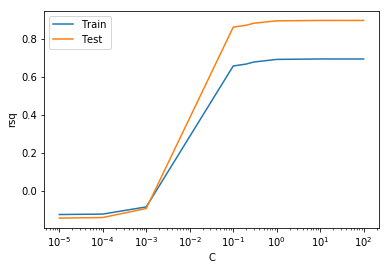

In [99]:
from sklearn.svm import LinearSVR
train_score_list=[]
test_score_list=[]
C=[0.00001,0.0001,0.001,0.1,0.2,0.3,1,10,100]

for i in C:
    svr = LinearSVR(C=i,max_iter=1000000,fit_intercept=True)
    svr.fit(x_train,y_train)
    train_score_list.append(svr.score(x_train,y_train))
    test_score_list.append(svr.score(x_test,y_test))

%matplotlib inline
plt.plot(C,train_score_list,label='Train')
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('rsq')
plt.plot(C,test_score_list,label='Test')
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('rsq')
plt.legend()

In [100]:
#grid search
from sklearn.model_selection import GridSearchCV
c= [0.1,0.2,0.3,0.5,1]
param_grid = dict(C=c)
grid = GridSearchCV(svr,param_grid, cv=5)
grid.fit(x_train,y_train)
print('best param is c ={}'.format(grid.best_params_))

best param is c ={'C': 0.2}


D:\Anaconda\envs\python3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [101]:
#cross validation
from sklearn.model_selection import cross_val_score
svr = LinearSVR(C=0.2,max_iter=10000)
scores_train = cross_val_score(svr,x_train,y_train, cv=5)
scores_test= cross_val_score(svr,x_test,y_test, cv=5)
print('avg train score {}'.format(scores_train.mean()))
print('avg test score {}'.format(scores_test.mean()))

avg train score 0.696456121598234
avg test score 0.556708852641661


## Applying Pasting on Linear SVM Regression

In [102]:
#grid search for pasting params
param_grid=[{'n_estimators':[50,100,150,200,300,400,500,1000],'max_samples':[0.1,0.2,0.4,0.6,0.8]}]
svr = LinearSVR(C=0.2,max_iter=10000)
bag_reg= BaggingRegressor(svr,bootstrap=False, n_jobs=-1,random_state=0)
grid = GridSearchCV(bag_reg,param_grid,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

D:\Anaconda\envs\python3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_samples': 0.1, 'n_estimators': 150}

In [103]:
svr.fit(x_train,y_train)
svr.score(x_test,y_test)

0.8719929768805132

plotting graphs to cross check the best pasting param n_estimators 

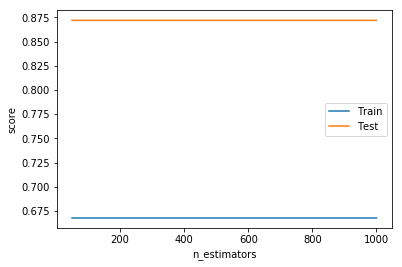

In [104]:
#pasting
from sklearn.ensemble import BaggingRegressor
train_score_list=[]
test_score_list=[]
for i in [50,100,150,200,300,400,500,1000]:
    svr = LinearSVR(C=0.2,max_iter=10000)
    bag_reg= BaggingRegressor(svr,n_estimators=i,max_samples=0.1,bootstrap=False, n_jobs=-1,random_state=0)
    bag_reg.fit(x_train,y_train)
    val_train=bag_reg.score(x_train,y_train)
    train_score_list.append(val_train)
    val_test= bag_reg.score(x_test,y_test)
    test_score_list.append(val_test)
#plot
plt.figure()
plt.plot([50,100,150,200,300,400,500,1000],train_score_list,label='Train')
plt.plot([50,100,150,200,300,400,500,1000],test_score_list,label='Test')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend()
plt.show()

In [151]:
train_score_list

[0.6678049615194139,
 0.6677811013091092,
 0.6677960714724412,
 0.6677950262801468,
 0.6678030912787309,
 0.6678009894187067,
 0.6677983173640702,
 0.6677954155367881]

In [105]:
print(train_score_list[2],test_score_list[2])

0.6677960714724412 0.8719939598006106


## Applying AdaBoost on Linear SVM Regression

In [106]:
#adaboost 
#finding best params using grid search for adaboost
#grid search to find the best parameters
from sklearn.ensemble import AdaBoostRegressor
param_grid=[{'n_estimators':[2,5,10,25,100,150,200,300,400,500],'learning_rate':[0.0001,0.01,0.02,0.03,0.04,0.05,0.06,0.1,0.15]}]
svr = LinearSVR(C=0.2,max_iter=10000)
ada = AdaBoostRegressor(svr,random_state=0)
grid = GridSearchCV(ada,param_grid,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

D:\Anaconda\envs\python3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.05, 'n_estimators': 5}

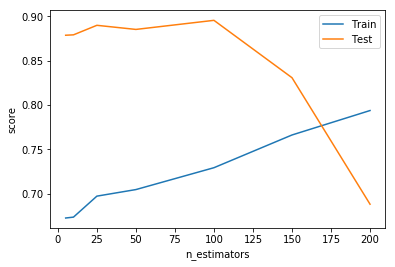

In [107]:
#plotting a graph to check weather the best parameter we got is the right one
#plotting a train test graph to see if the param  n_estimator is reliable
train_score_list=[]
test_score_list=[]
for i in [5,10,25,50,100,150,200]:
    svr = LinearSVR(C=0.2,max_iter=10000)
    ada = AdaBoostRegressor(svr,n_estimators=i,learning_rate=0.01,random_state=0)
    ada.fit(x_train,y_train)
    val_train=ada.score(x_train,y_train)
    train_score_list.append(val_train)
    val_test= ada.score(x_test,y_test)
    test_score_list.append(val_test)
#plot
plt.figure()
plt.plot([5,10,25,50,100,150,200],train_score_list,label='Train')
plt.plot([5,10,25,50,100,150,200],test_score_list,label='Test')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend()
plt.show()


In [108]:
print(train_score_list[0],test_score_list[0])


0.6725144672104871 0.8786779014188852


# Deep Learning

## 1. Perceptron

In [39]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [43]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(32,input_dim = 9 ,kernel_initializer='normal',activation = 'relu'))
#hidden layers
model1.add(Dense(16,input_dim = 9 ,kernel_initializer='normal',activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

In [44]:
#step 2: make computational graph - compile
model1.compile(loss= 'mean_absolute_error' , optimizer = 'adam',metrics = ['mean_absolute_error'] )

In [45]:
#step 3: train the model - fit
model1.fit(x_train, y_train, epochs = 50, batch_size = 300)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
608/608 [==============================] - 1s 1ms/sample - loss: 5.6287 - mean_absolute_error: 5.6287
Epoch 2/50
608/608 [==============================] - 0s 43us/sample - loss: 5.6263 - mean_absolute_error: 5.6263
Epoch 3/50
608/608 [==============================] - 0s 44us/sample - loss: 5.6239 - mean_absolute_error: 5.6239
Epoch 4/50
608/608 [==============================] - 0s 29us/sample - loss: 5.6215 - mean_absolute_error: 5.6215
Epoch 5/50
608/608 [==============================] - 0s 28us/sample - loss: 5.6187 - mean_absolute_error: 5.6187
Epoch 6/50
608/608 [==============================] - 0s 27us/sample - loss: 5.6155 - mean_absolute_error: 5.6155
Epoch 7/50
608/608 [==============================] - 0s 27us/sample - loss: 5.6118 - mean_absolute_error: 5.6118
Epoch 8/50
608/608 [==============================] - 0s 34us/sample - loss: 5.6077 - mean_absolute_error: 5.6077
Epoch 9/50
608/608 [=====================

In [47]:
#step 4: evaluate
print(model1.evaluate(x_train, y_train))
print(model1.evaluate(x_test, y_test))

608/608 [==============================] - 0s 290us/sample - loss: 5.3616 - mean_absolute_error: 5.3616
[5.361575151744642, 5.3615756]
153/153 [==============================] - 0s 72us/sample - loss: 4.2757 - mean_absolute_error: 4.2757
[4.275655930338342, 4.2756557]


## 2. MLP

In [48]:
#step 1: build model
model2 = Sequential()
#input layer
model2.add(Dense(20, input_dim = 9, activation = 'relu'))
#hidden layers
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(5, activation = 'relu'))
#output layer
model2.add(Dense(1, activation = 'sigmoid'))

In [49]:
#step 2: compile the model
model2.compile(loss= 'mean_squared_error' , optimizer = 'adam',metrics = ['mean_squared_error'] )

Instructions for updating:
Use tf.cast instead.


In [51]:
#step 3: train the model
model2.fit(x_train, y_train, epochs = 30, batch_size = 150)

Epoch 1/30
608/608 [==============================] - 1s 1ms/sample - loss: 316.2027 - mean_squared_error: 316.2027
Epoch 2/30
608/608 [==============================] - 0s 42us/sample - loss: 316.0600 - mean_squared_error: 316.0600
Epoch 3/30
608/608 [==============================] - 0s 38us/sample - loss: 315.9367 - mean_squared_error: 315.9366
Epoch 4/30
608/608 [==============================] - 0s 35us/sample - loss: 315.8169 - mean_squared_error: 315.8169
Epoch 5/30
608/608 [==============================] - 0s 35us/sample - loss: 315.7072 - mean_squared_error: 315.7072
Epoch 6/30
608/608 [==============================] - 0s 43us/sample - loss: 315.5967 - mean_squared_error: 315.5967
Epoch 7/30
608/608 [==============================] - 0s 40us/sample - loss: 315.4889 - mean_squared_error: 315.4889
Epoch 8/30
608/608 [==============================] - 0s 34us/sample - loss: 315.3613 - mean_squared_error: 315.3613
Epoch 9/30
608/608 [==============================] - 0s 33us/sam

In [53]:
#step 4: evaluate
print(model2.evaluate(x_train, y_train))
print(model2.evaluate(x_test, y_test))

608/608 [==============================] - 0s 336us/sample - loss: 312.0261 - mean_squared_error: 312.0261
[312.02610645796125, 312.0261]
153/153 [==============================] - 0s 58us/sample - loss: 181.5221 - mean_squared_error: 181.5221
[181.52211038427416, 181.52211]
